# **_Left and Right Inverse for Non-Square Matrices_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This notebook demonstrates concepts I learned from a lesson in Mike X. Cohen's Linear Algebra course on Udemy.

-   Udemy course: https://www.udemy.com/course/linear-algebra-theory-and-implementation

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Inverting a Non-Square Matrix?_**

-   A matrix multiplied by its inverse produces the identity matrix.

-   There is no direct inverse to a non-square matrix, so we need a substitute.

-   We can mutate the original matrix into a square form by multiplying it by its transpose, multiplying that compound stucture by its inverse, then factoring out the original matrix.

-   What remains is either the left-inverse (original matrix is _tall_) or the right-inverse (original matrix is _wide_).

-   For a tall (<font color=orangered style="font-weight: bold;">T</font>), full-column rank matrix, we left-multiply by the <font color=orangered style="font-weight: bold;">LEFT-INVERSE</font> to produce the identity matrix:

$$
\huge
    \textcolor{orangered}{(T^{T} T)^{-1} T^{T}}
    \quad
    T
    =
    {I}
$$

-   For a wide (<font color=dodgerblue style="font-weight: bold;">W</font>), full-row rank matrix, we _right-multiply_ the original matrix by its <font color=dodgerblue style="font-weight: bold;">RIGHT-INVERSE</font>:

$$
\huge
    W
    \quad
    \textcolor{dodgerblue}{W^{T}(W W^{T})^{-1}}
    =
    {I}
$$

-   Now we can get on with the business of whatever it is we want to do via multiplication of the original matrix by its inverse, with these substitutes in mind.

-   I'll learn more about that later...

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Python:_**

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sympy as sym

### **_Do the Calculations:_**

In [84]:
m, n = np.random.randint(23, 27), np.random.randint(19, 23)

In [85]:
# # Create a tall, full-column rank matrix...
# rows > columns:
TALL = np.random.randn(m, n)

# Create 'square' substitute:
TALLT_TALL = TALL.T @ TALL

# Calculate the left-inverse:
TALL_LEFT_INV = np.linalg.inv(TALLT_TALL) @ TALL.T

# Compute the identity matrix:
ID_TALL = TALL_LEFT_INV @ TALL

# Confirm numerically:
display(sym.sympify(np.round(ID_TALL, 13)))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [86]:
# # Create a wide, full-row rank matrix...
# columns > rows:
WIDE = np.random.randn(n, m)

# Create 'square' substitute:
WIDE_WIDET = WIDE @ WIDE.T

# Calculate the right-inverse:
WIDE_RIGHT_INV = WIDE.T @ np.linalg.inv(WIDE_WIDET)

# Compute the identity matrix:
ID_WIDE = WIDE @ WIDE_RIGHT_INV

# Confirm numerically:
display(sym.sympify(np.round(ID_WIDE, 13)))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Confirm Visually:_**

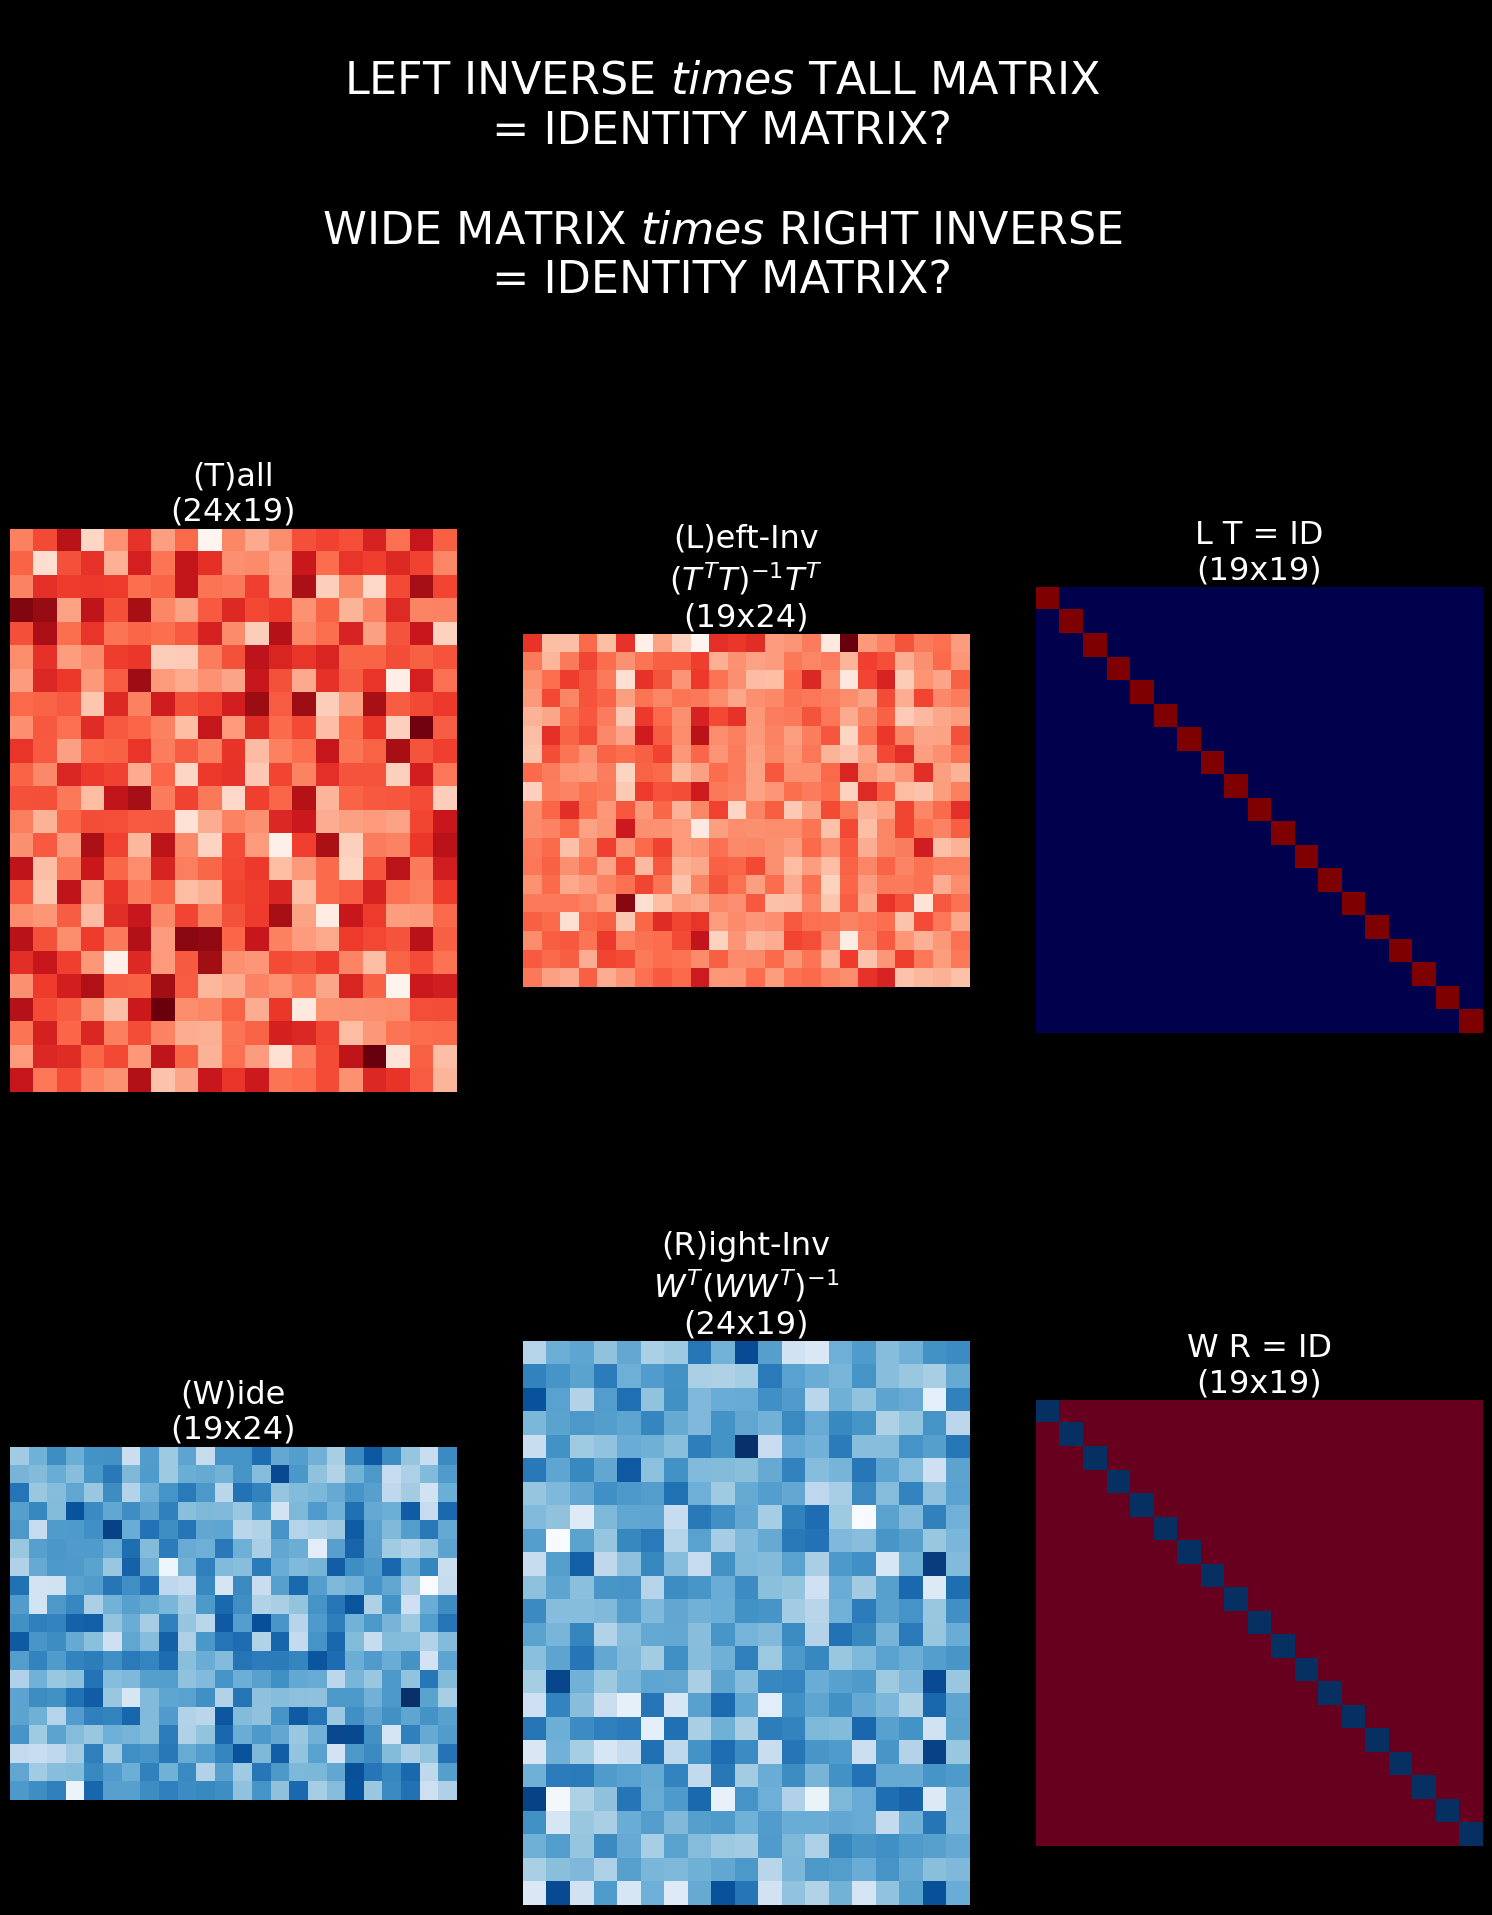

In [87]:
with plt.style.context("dark_background"):
    # Create figure:
    fig = plt.figure(figsize=(19, 23))

    # Define rows and columns via GridSpec:
    gs = GridSpec(2, 3, figure=fig, top=0.8, wspace=0.15, hspace=0.05)

    # Generate subplots:
    axes = [
        fig.add_subplot(gs[0, 0]),
        fig.add_subplot(gs[0, 1]),
        fig.add_subplot(gs[0, 2]),
        fig.add_subplot(gs[1, 0]),
        fig.add_subplot(gs[1, 1]),
        fig.add_subplot(gs[1, 2]),
    ]

    # Show tall matrix:
    axes[0].imshow(TALL, cmap="Reds")
    axes[0].set_title(f"(T)all\n({m}x{n})", size=23)

    # Show tall matrix's left-inverse:
    axes[1].imshow(TALL_LEFT_INV, cmap="Reds")
    axes[1].set_title(
        "(L)eft-Inv\n$(T^T T)^{-1} T^T$\n(%gx%g)"
        % (TALL_LEFT_INV.shape[0], TALL_LEFT_INV.shape[1]),
        size=23,
    )

    # Show identity matrix product:
    axes[2].imshow(ID_TALL, cmap="seismic")
    axes[2].set_title(
        f"L T = ID\n({ID_TALL.shape[0]}x{ID_TALL.shape[1]})",
        size=23,
    )

    # Show wide matrix:
    axes[3].imshow(WIDE, cmap="Blues")
    axes[3].set_title(f"\n(W)ide\n({n}x{m})", size=23)

    # Show wide matrix's right-inverse:
    axes[4].imshow(WIDE_RIGHT_INV, cmap="Blues")
    axes[4].set_title(
        "\n(R)ight-Inv\n$W^T (W W^T)^{-1}$\n(%gx%g)"
        % (WIDE_RIGHT_INV.shape[0], WIDE_RIGHT_INV.shape[1]),
        size=23,
    )

    # Show identity matrix product:
    axes[5].imshow(ID_WIDE, cmap="RdBu")
    axes[5].set_title(
        f"\nW R = ID\n({ID_WIDE.shape[0]}x{ID_WIDE.shape[1]})",
        size=23,
    )

    for i in range(len(axes)):
        axes[i].axis("off")

    sup_title = "\nLEFT INVERSE $times$ TALL MATRIX\n= IDENTITY MATRIX?"
    sup_title += "\n\nWIDE MATRIX $times$ RIGHT INVERSE\n= IDENTITY MATRIX?"
    plt.suptitle(sup_title, size=32)

    plt.show()

-   We got the ID Matrix both times. Time for supper.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://www.andrewblais.dev/

</font>